<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II - R4001
# Trabajo semanal 7
#### Benjamín Ithurburu

## Introducción
En este notebook se abordará la resolución de los ejercicios 1) y 2) de la TS7.

El primer ejercicio se centra en un circuito que incluye un transformador ideal y varias resistencias. El objetivo será calcular los parámetros de la matriz impedancia $Z$.

En el segundo ejercicio, se determinará la función transferencia del circuito mediante la interconexión de cuadripolos, y por medio de la matriz de admitancias indefinida $MAI$.

In [1]:
from IPython.display import IFrame
IFrame("./Trabajo semanal 7.pdf", width=1000, height=1000)

### Simulación Python
A continuación se procede a instanciar funciones y configurar el entorno del notebook para su posterior uso en las simulaciones.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib ipympl
import numpy as np
from scipy import signal
from scipy.signal import TransferFunction

# módulo de análisis simbólico
from sympy import *
init_printing(use_unicode=True)
import sympy as sp
# variable de Laplace
from sympy.abc import s
from IPython.display import display, Math, Markdown

from pytc2.sistemas_lineales import parametrize_sos, pzmap, GroupDelay, bodePlot, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle

# Configuración de parámetros para fijar estilo de gráficos en notebook. 
# Con el objetivo de que el tamaño de salida, sea adecuado al jubyter notebook.

#%% Inicialización de librerías

# Para eliminar bugs:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 14
fig_sz_y = 8
fig_dpi = 70
fig_front_size = 15

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_front_size})

#%% Fin - Inicialización de librerías

## Ejercicio #1

##### Esquemático
<center><img src="./circuito_simulacion_ej1.png" width="1000"/></center>

##### Parámetros Z
<center><img src="./simulacion_param_Z.png" width="1000"/></center>

Se observa que en los cuatro gráficos, el módulo de cada parámetro es $0.3\Omega$, confirmando lo obtenido en el PDF. Además, en los gráficos correspondientes a $Z_{12}$ y $Z_{21}$, se puede notar que el valor de fase es de 180°, lo cual valida el signo negativo asociado a estos parámetros.

#### Cálculo de $Z_{in}$

In [3]:
G1, G2, G3 = sp.symbols("G1, G2, G3")

Z = 1/(G1 + 4*G2 + G3) 

Zin = Z.subs(G1, 1).subs(G2, 1/2).subs(G3, 1/3)

display(Math( r'Z_{in} = ' + sp.latex(Z)))

display(Math( r'Z_{in} = ' +  sp.latex(Zin)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Ejercicio #2

Se procede a obtenerse la función transferencia $\frac{V_o}{V_i}$ a partir de la interconexión en cascada de dos cuadripolos con la configuración $L$

In [4]:
Z1, Y2, Z3, Y4 = sp.symbols("Z1, Y2, Z3, Y4")

Ta = Matrix([[Z1*Y2+1, Z1], [Y2, 1]])
Tb = Matrix([[Z3*Y4+1, Z3], [Y4, 1]])
T = Ta * Tb

A = T[0,0]

display(Math(' Parámetro\ A\ =\ ' + sp.latex(A)))
display(Math(r' \frac{V_o}{V_i} =\ \frac{1}{A}\ =\ ' + sp.latex(A**-1)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Reemplazo de impedancias $Z$ y admitancias $Y$ por los respectivos componentes

In [5]:
s = sp.symbols('s', complex=True)
L1, C2, L3, R = sp.symbols("L1, C2, L3, R")
Z1 = s*L1
Y2 = s*C2
Z3 = s*L3
Y4 = 1/R

Ta = Matrix([[Z1*Y2+1, Z1], [Y2, 1]])
Tb = Matrix([[Z3*Y4+1, Z3], [Y4, 1]])
T = Ta * Tb

A = T[0,0]

display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(collect(sp.simplify(sp.expand(A**-1)), s))))

<IPython.core.display.Math object>

Se obtiene la función transferencia $\frac{V_o}{V_i}$ por medio de la matriz de admitancias indefinida $MAI$

In [6]:
s = sp.symbols('s', complex=True)
Y1, Y2, Y3, Y4 = sp.symbols("Y1, Y2, Y3, Y4")
L1, C2, L3, R = sp.symbols("L1, C2, L3, R")

Y1 = 1/(s*L1)
Y2 = s*C2
Y3 = 1/(s*L3)
Y4 = 1/R

num = Y1*Y3
den = (Y1+Y2+Y3)*(Y3+Y4)-(Y3**2)

display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(collect(sp.simplify(sp.expand(sp.Mul(num/den, evaluate=False))), s))))


<IPython.core.display.Math object>

Reemplazo de valores para obtención de Bode y diagrama de PZ

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

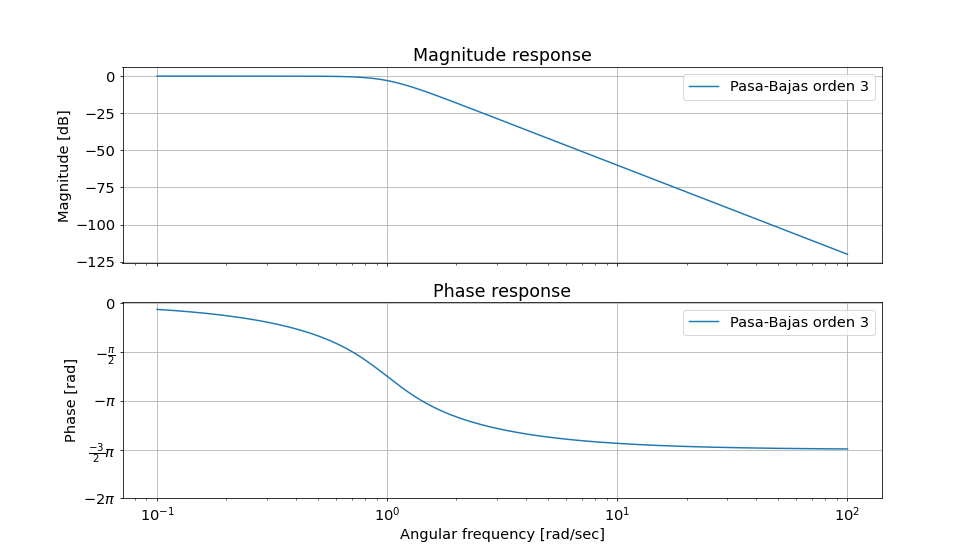

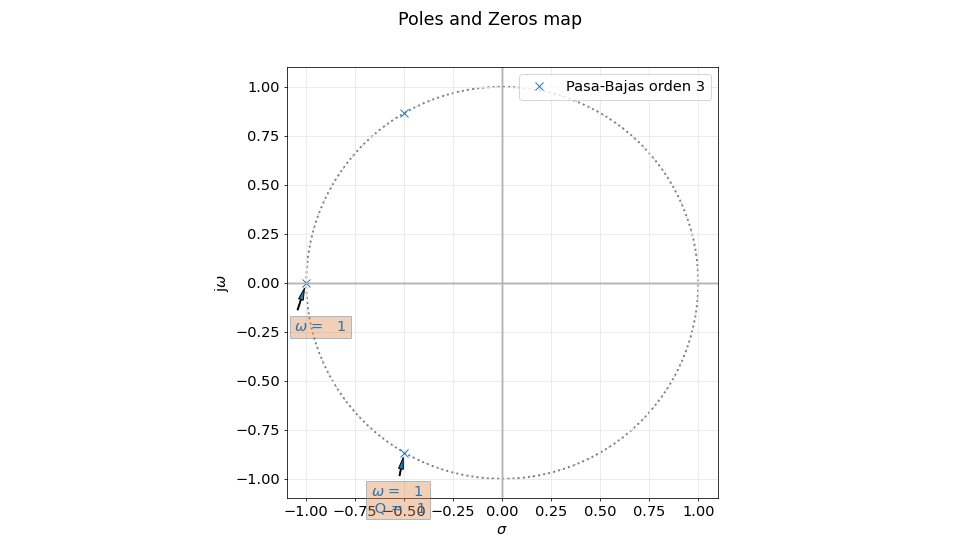

In [7]:
L1 = 3/2
C2 = 4/3
L3 = 1/2
R = 1

Y1 = 1/(s*L1)
Y2 = s*C2
Y3 = 1/(s*L3)
Y4 = 1/R

num = Y1*Y3
den = (Y1+Y2+Y3)*(Y3+Y4)-(Y3**2)

num, den = sp.fraction(sp.simplify(sp.expand(sp.Mul(num/den, evaluate=False))))

num1 = np.float64(sp.Poly(num,s).all_coeffs())
den1 = np.float64(sp.Poly(den,s).all_coeffs())

# Obtención de función transferencia
my_tf = TransferFunction(num1,den1)

# Gráfico Bode
fig1, axs = bodePlot(my_tf, filter_description='Pasa-Bajas orden 3', npoints=10000)

# Gráfico de Polos y Ceros
pzmap(my_tf, True, filter_description='Pasa-Bajas orden 3')


Se corrobora que los polos se encuentran sobre una circunferencia de radio unitario, tal como lo menciona la consigna.

### Simulación circuital

##### Esquemático
<center><img src="./circuito_simulacion_ej2.png" width="1000"/></center>

##### Respuesta en frecuencia
<center><img src="./bode_simulacion_ej2.png" width="1000"/></center>

Se observa que la frecuencia de corte se encuentra en $159.06898mHz$ y dado que $\omega_o = 2\pi \cdot f_c \approx 1\ rad/seg$, tal como se obtuvo en la simulación realizada en Python. Esto confirma que la obtención de la función de transferencia mediante la interconexión de cuadripolos y la matriz de admitancias indefinida (MAI) se realizó de manera correcta.